In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import os

np.random.seed(1234)

In [2]:
TEST_PREDICTIONS_FILENAME = "./runs/justresnet_test_predictions.pkl"
NUM_IMAGES_TO_SHOW = 16
NUM_COLS = 4
NUM_ROWS = NUM_IMAGES_TO_SHOW // NUM_COLS + int(NUM_IMAGES_TO_SHOW % NUM_COLS != 0)

In [3]:
def draw_landmarks(image, landmarks):
    for point in landmarks:
        x, y = point.astype(np.int)
        cv2.circle(image, (x, y), 1, (128, 0, 128), 1, -1)
    return image

In [4]:
with open(TEST_PREDICTIONS_FILENAME, "rb") as fp:
    results = pickle.load(fp)
image_names = results["image_names"]
landmarks = results["landmarks"]

print("Images:", len(image_names))
print("Landmarks shape:", landmarks.shape)

if len(image_names) < NUM_IMAGES_TO_SHOW:
    raise RuntimeError(f"Choose less images to show, you have only {len(image_names)}")

Images: 16000
Landmarks shape: (16000, 971, 2)


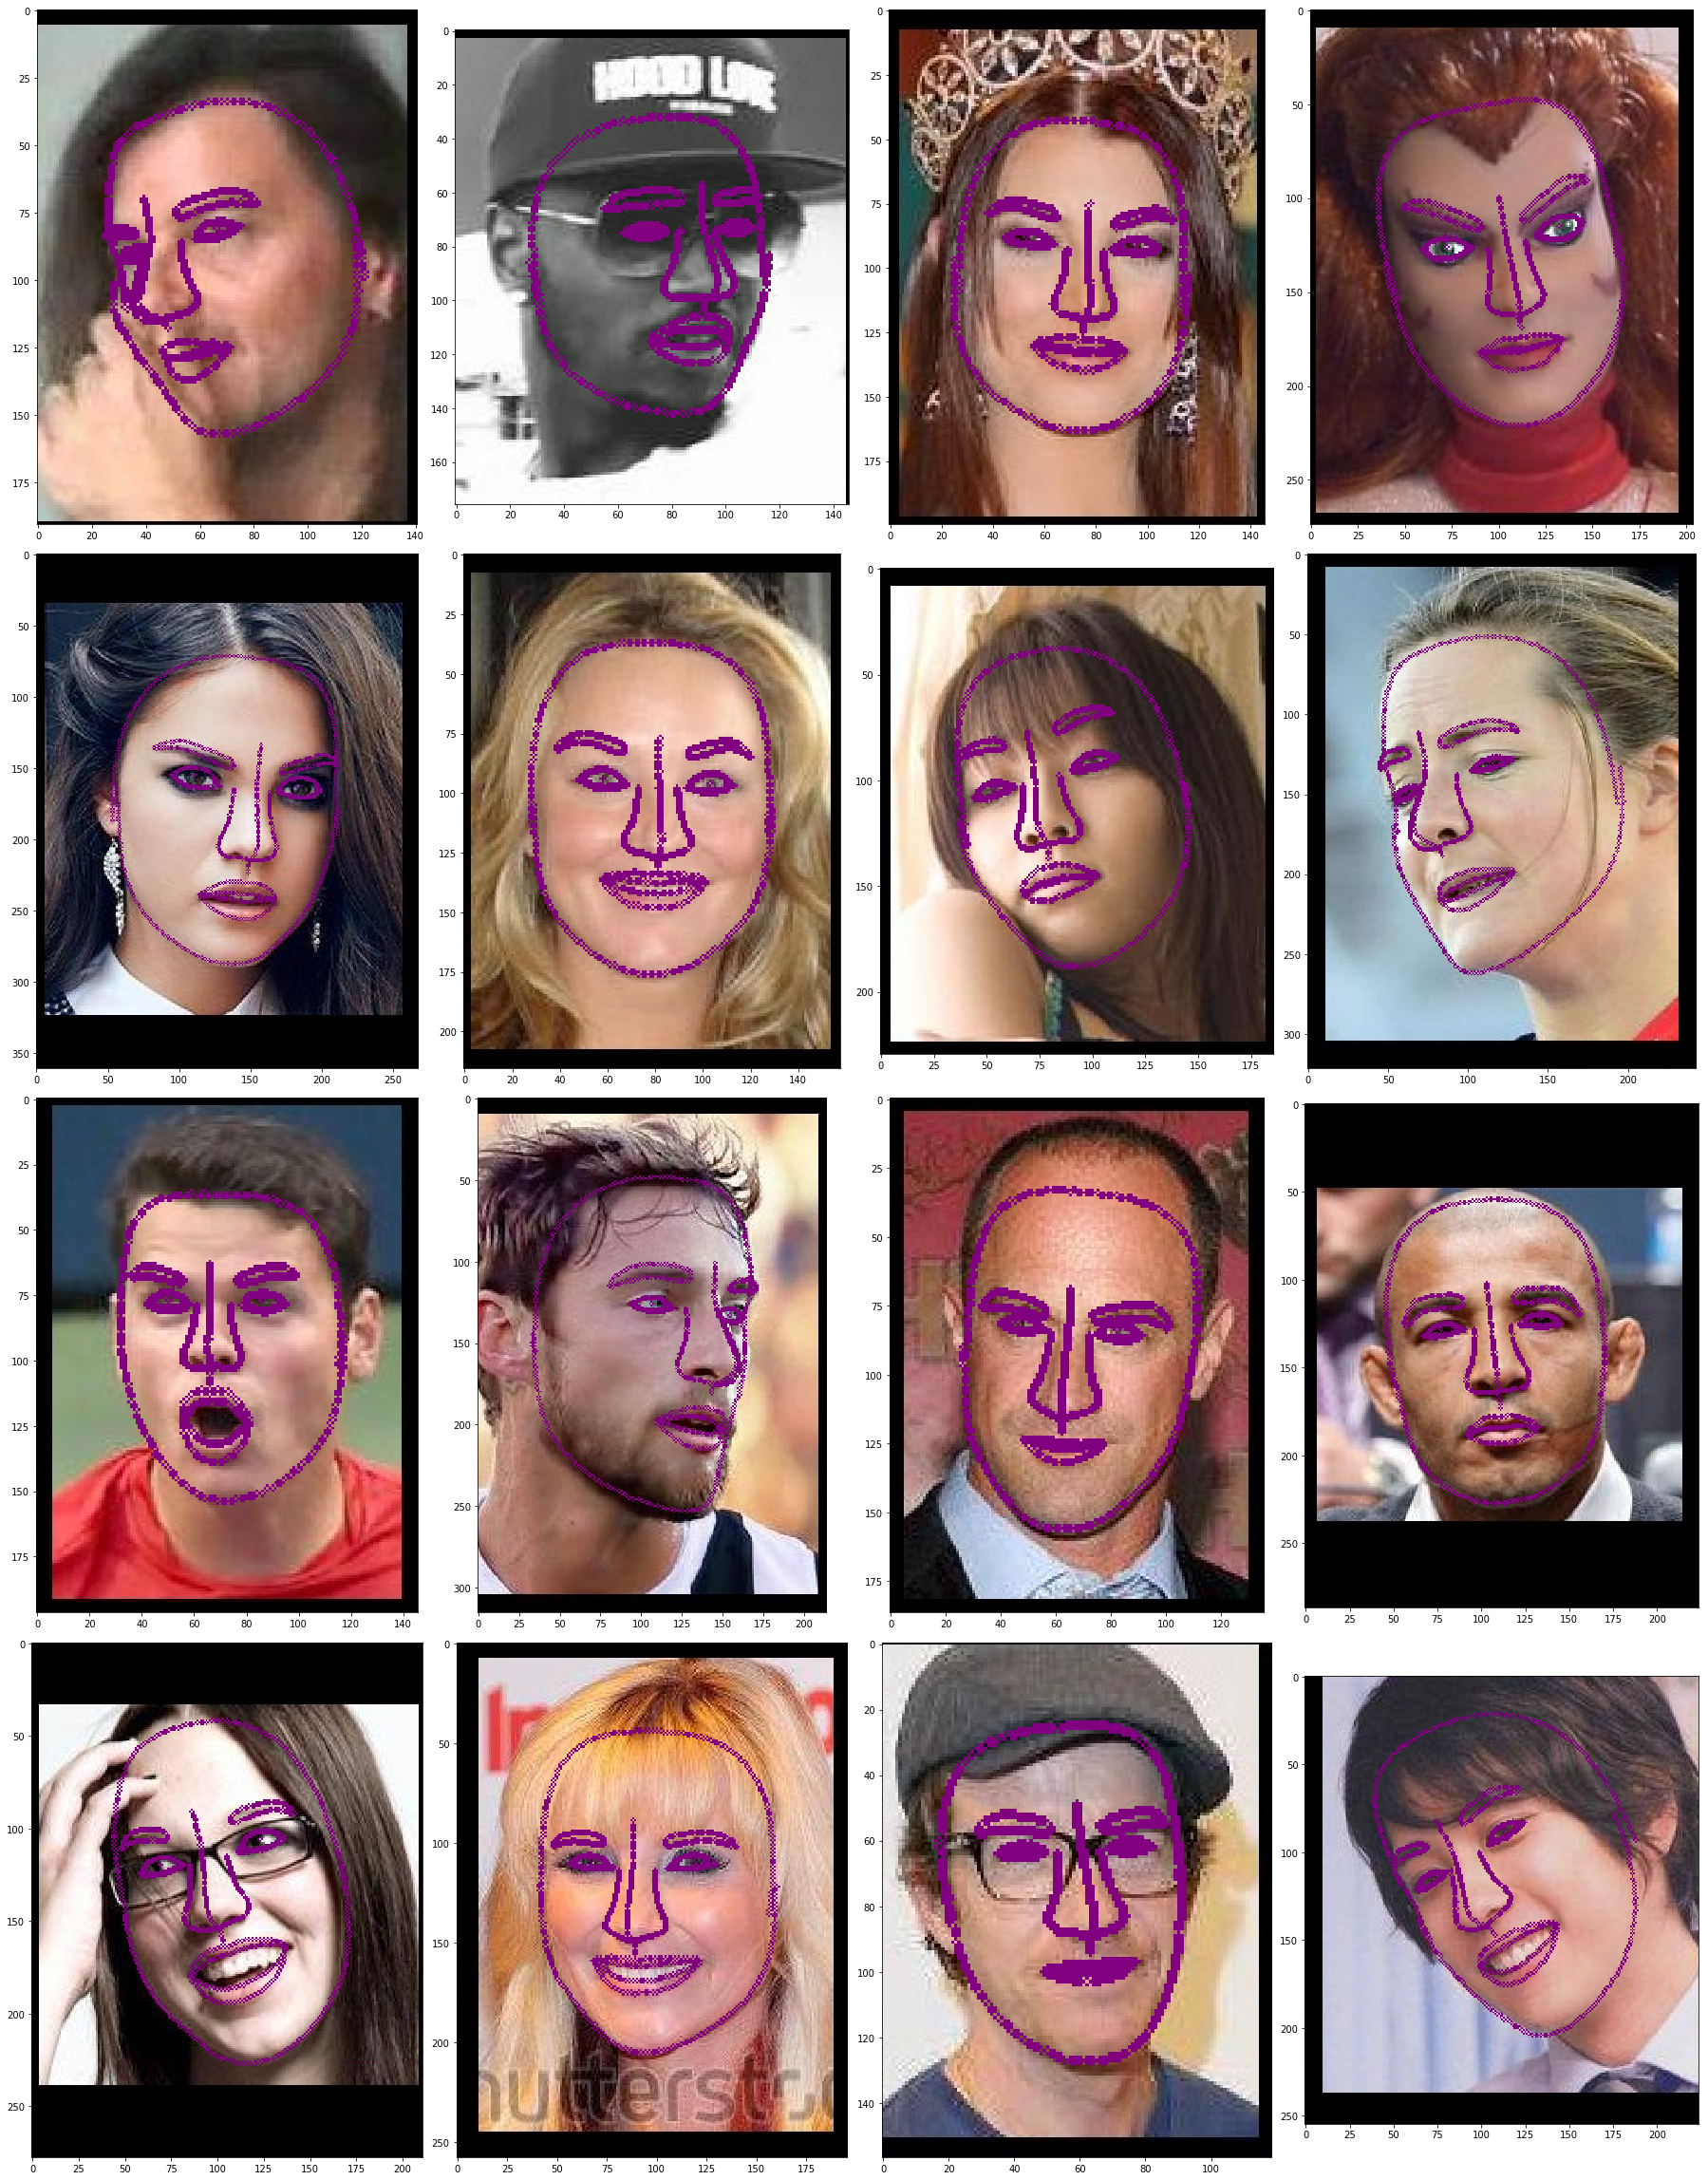

In [5]:
random_idxs = np.random.choice(len(image_names), size=min(NUM_IMAGES_TO_SHOW, len(image_names)), replace=False)

plt.figure(figsize=(25, NUM_ROWS * 8))
for i, idx in enumerate(random_idxs, 1):
    image = cv2.imread(image_names[idx])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = draw_landmarks(image, landmarks[idx])
    
    plt.subplot(NUM_ROWS, NUM_COLS, i)
    plt.imshow(image)

plt.tight_layout()
plt.show()

In [3]:
import pandas as pd

In [6]:
resnet432 = pd.read_csv('runs/resnet_d_432_submit.csv')
avg = pd.read_csv('runs/avg_submit.csv')
ft = pd.read_csv('runs/resnet_d_ft_submit.csv')
ft1 = pd.read_csv('runs/resnet_d_ft1_submit.csv')


In [7]:
submit = resnet432.copy()
submit.iloc[:, 1:] += avg.iloc[:, 1:]
submit.iloc[:, 1:] += ft.iloc[:, 1:]
submit.iloc[:, 1:] += ft1.iloc[:, 1:]
submit.iloc[:, 1:] /= 4

submit = submit.set_index('file_name')
submit.astype(int).to_csv('runs/final_submit.csv')

In [8]:
submit.head()

,Point_M0_X,Point_M0_Y,Point_M1_X,Point_M1_Y,Point_M2_X,Point_M2_Y,Point_M3_X,Point_M3_Y,Point_M4_X,Point_M4_Y,...,Point_M25_X,Point_M25_Y,Point_M26_X,Point_M26_Y,Point_M27_X,Point_M27_Y,Point_M28_X,Point_M28_Y,Point_M29_X,Point_M29_Y
file_name,,,,,,,,,,,,,,,,,,,,,
fca085b03b834d9d94170e8f1453276e.jpg,54.00,124.25,43.25,114.00,83.00,80.00,85.50,68.75,102.25,72.75,...,57.00,120.00,39.00,68.75,98.75,112.50,61.00,152.75,39.25,78.00
314153ca3f8999b9ef129b3bd0fdbd0b.jpg,68.50,117.75,29.75,73.25,47.25,86.00,65.00,74.75,36.25,72.00,...,64.25,72.50,64.25,95.75,34.25,92.50,72.00,72.00,47.25,72.00
f071f25018daeb373b4735830cc2ef9f.jpg,39.00,87.75,35.25,96.50,37.00,89.00,29.00,83.75,119.75,120.25,...,40.00,139.00,46.00,114.50,52.75,125.00,64.25,130.50,70.00,69.75
20da86fa93ef1877bc6693a180277134.jpg,95.75,103.50,160.00,122.50,135.75,136.75,84.75,81.75,112.25,172.25,...,152.50,107.50,152.75,168.75,91.50,89.75,128.00,111.75,94.00,102.75
7f01740a38960addd76b090c02b72f50.jpg,75.75,81.25,44.00,79.75,40.75,71.75,62.00,101.75,41.25,95.00,...,129.25,81.75,67.00,78.75,74.50,77.75,41.00,45.25,73.00,81.75


In [9]:
ft1.head()

,file_name,Point_M0_X,Point_M0_Y,Point_M1_X,Point_M1_Y,Point_M2_X,Point_M2_Y,Point_M3_X,Point_M3_Y,Point_M4_X,...,Point_M25_X,Point_M25_Y,Point_M26_X,Point_M26_Y,Point_M27_X,Point_M27_Y,Point_M28_X,Point_M28_Y,Point_M29_X,Point_M29_Y
0,fca085b03b834d9d94170e8f1453276e.jpg,54,124,44,114,83,80,85,68,102,...,57,120,39,69,99,113,61,153,39,78
1,314153ca3f8999b9ef129b3bd0fdbd0b.jpg,69,117,29,75,47,86,65,75,36,...,64,73,64,96,34,92,72,72,47,72
2,f071f25018daeb373b4735830cc2ef9f.jpg,39,88,35,97,37,89,29,84,120,...,40,139,46,115,53,125,65,130,71,70
3,20da86fa93ef1877bc6693a180277134.jpg,96,104,159,122,136,137,84,82,112,...,153,107,153,169,91,90,128,111,94,103
4,7f01740a38960addd76b090c02b72f50.jpg,75,81,44,80,41,72,61,102,41,...,130,83,67,78,74,77,41,45,73,81


In [70]:
crop224 = crop224.set_index('file_name')

In [1]:
import timm

In [2]:
model = timm.create_model('resnet34d', pretrained=True)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet34d_ra2-f8dcfcaf.pth" to /home/cherepaha/.cache/torch/hub/checkpoints/resnet34d_ra2-f8dcfcaf.pth


In [3]:
model

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
 